## Import necessary library

In [1]:
import pandas as pd
import numpy as np

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Load dataset

In [ ]:
df = pd.read_csv("../assets/BankChurners.csv", sep=",")
df.head()

## Dataset exploration


In [ ]:
df.info()

In [ ]:
# Check for duplicate values
df.duplicated().sum()

In [ ]:
# Check if there is a missing value in the dataset
df.isnull().sum() #non missing value in the dataset

## Data Cleaning

In [6]:
#clean the data based on a copy of original dataset
df1=df.copy()

In [7]:
# Drop last two columns which are irrelevant
df1.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True )

In [8]:
#drop the CLIENTNUM column, as it will not be used for predication
df1 = df1.iloc[:,1:]

In [9]:
#function to create the chart
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=['b','g','r','m','c', 'y']):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

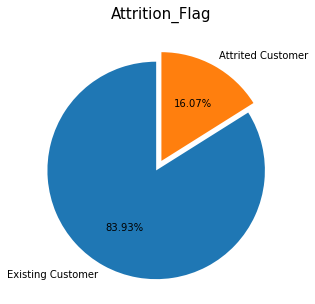

In [10]:
# Prepare the data for plotting
attr_count = df1['Attrition_Flag'].value_counts()
attr_label = df1['Attrition_Flag'].value_counts().index

# Plot
fig,ax = plt.subplots(figsize=(7,5))
# pie plot
ax.pie(attr_count, explode=(0.1,0), labels=attr_label, autopct='%.2f%%', startangle=90)
ax.set_title('Attrition_Flag', fontsize=15)
# show plot
plt.show()

#### Comments:
16.07% of customers are leaving 

## Check correlation heatmap

In [12]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

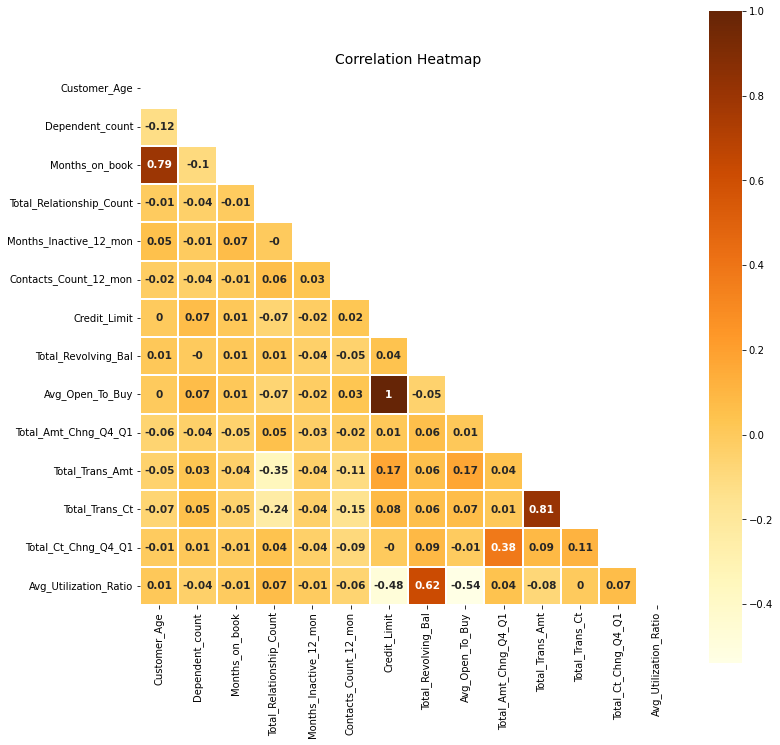

In [13]:
var_corr = round(df1.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

### Comments:

Here we can see that some feature are highly correlated, such as:

* Avg_Open_To_Buy and Credit_Limit (1)

* Total_Trans_Ct and Total_Trans_Amt (0.81)

* Months_on_book and Customer_Age (0.79)

In [ ]:
# drop highly correlated feature
df_trans = df1.drop(columns=['Avg_Open_To_Buy','Total_Trans_Amt','Months_on_book'])

# updated DataFrame
df_trans.info()

In [15]:
#define the categorical and numeric columns
target_col = 'Attrition_Flag'

cat_cols = ["Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category",
                     "Total_Relationship_Count","Months_Inactive_12_mon"
                    ,"Contacts_Count_12_mon"]

num_cols = ["Customer_Age","Credit_Limit","Total_Revolving_Bal","Total_Amt_Chng_Q4_Q1","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]

## Distribution of features as per Attrition_Flag

In [16]:
#create distribution chart for existing and churn customer
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_churn_dist(data, cols):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col='Attrition_Flag'
                , kind='bar'
                , aspect = 0.8
                , alpha = 0.6)
                
        if feature == 'Income_Category' or feature == "Education_Level":
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
        
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()

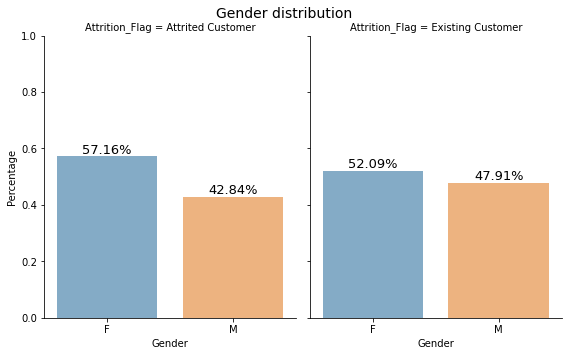

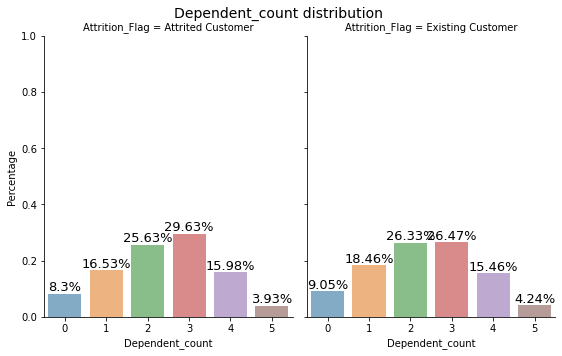

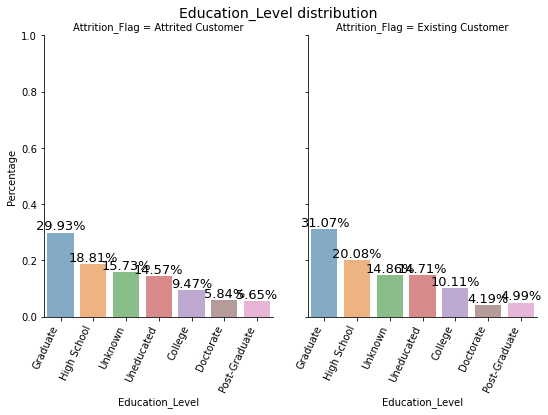

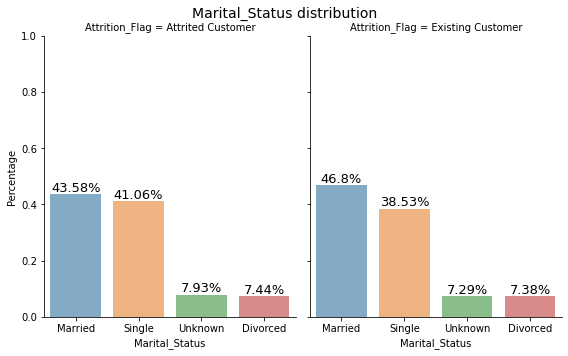

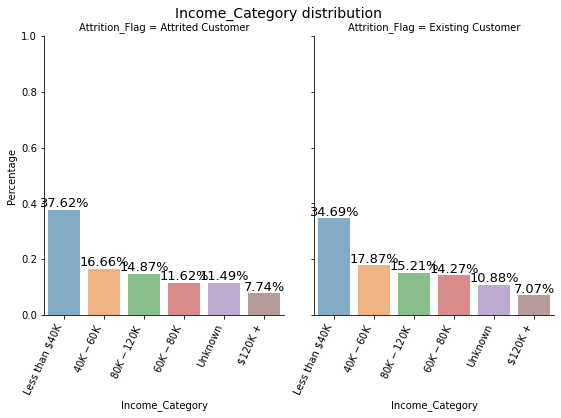

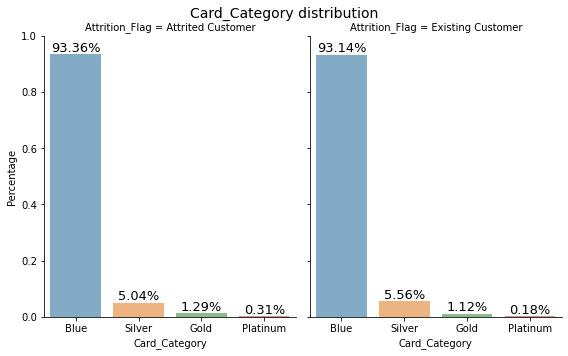

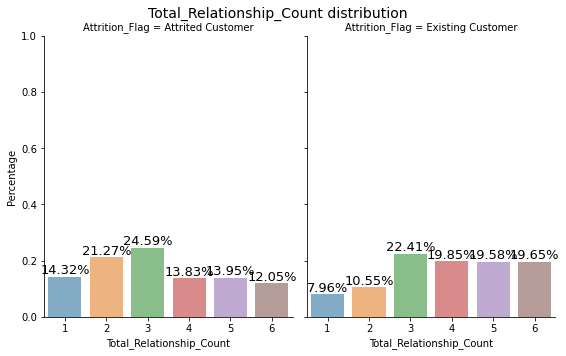

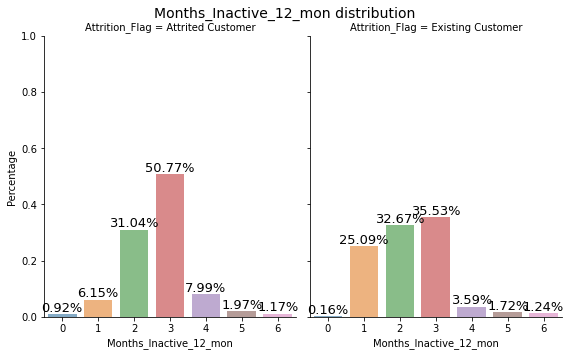

posx and posy should be finite values
posx and posy should be finite values


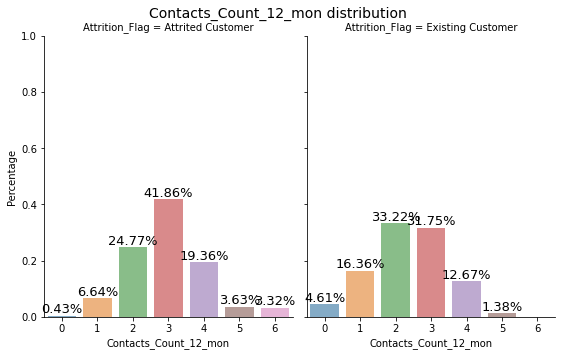

In [17]:
churn_summary = df1.groupby('Attrition_Flag')
Categorical_var_churn_dist(churn_summary, cat_cols)


Profile of Churn vs Existing customers based on above analysis
Churn customers are likely to
* more female than male
* income most among $40K - $60K'
* less total relationship
* more 'Post-Graduate' education background
* more customer contacts (important)
* month inactive 12 month (important)

In [18]:
# Mean summary of customers (Churn vs Non churn)
print(df1.groupby('Attrition_Flag')[num_cols].mean())

                   Customer_Age  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                       
Attrited Customer     46.659496   8136.039459           672.822987   
Existing Customer     46.262118   8726.877518          1256.604118   

                   Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag                                                                 
Attrited Customer              0.694277       44.933620             0.554386   
Existing Customer              0.772510       68.672588             0.742434   

                   Avg_Utilization_Ratio  
Attrition_Flag                            
Attrited Customer               0.162475  
Existing Customer               0.296412  


Churn customer has the following character:

1. less "Total_Revolving_Bal"
2. less Total_Trans_Amt and Total_Trans_Ct 
4. lower utilization rate

In [19]:
#save the cleaned data
df1.to_csv("../assets/train_data.csv",index=False)